### Installing Required Libraries

The following command installs essential libraries for our project:

- **`torch` & `torchvision`**: PyTorch, a deep learning framework, and its companion library for handling computer vision tasks.
- **`numpy`**: A fundamental library for numerical computing in Python, used for array manipulation and operations.
- **`matplotlib`**: A plotting library to visualize data and results in the form of graphs and plots.
- **`transformers`**: Hugging Face's library for state-of-the-art pre-trained models, especially used in NLP tasks.
- **`mahotas`**: A library for image processing and computer vision, helpful for tasks like filtering and feature extraction.

Run the cell below to install these libraries. If you’re using Google Colab, these installations are required to ensure all dependencies are available for execution.

```bash
!pip install torch torchvision numpy matplotlib transformers mahotas


In [4]:
!pip install torch torchvision numpy matplotlib transformers mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.5 MB/s eta 0:00:00


### Mounting Google Drive in Colab

To access files from **Google Drive** within a Colab notebook, we need to mount the Drive. This allows us to read from and write to Drive as if it's part of the local file system.

The command below does the following:
1. **`from google.colab import drive`**: Imports the `drive` module, which provides utilities to interact with Google Drive.
2. **`drive.mount('/content/drive')`**: This command mounts your Google Drive at the `/content/drive` path, making all files accessible within the notebook.

After running this cell:
- You’ll be prompted to authorize access by logging into your Google account.
- Once authorized, your Drive files will be accessible under `/content/drive/MyDrive`.

```python
from google.colab import drive
drive.mount('/content/drive')


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Extracting a ZIP File

In this section, we will extract a ZIP file containing computed tomography images for intracranial hemorrhage detection and segmentation. The following steps are performed:

1. **Import the `zipfile` module**: This module allows us to work with ZIP archives in Python.
2. **Create a `ZipFile` object**: The command `zipfile.ZipFile("/content/drive/MyDrive/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1.zip", 'r')` opens the specified ZIP file in read mode.
3. **Extract the contents**: The method `zip_ref.extractall("/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1")` extracts all files from the ZIP archive to the specified directory.
4. **Close the ZIP file**: Finally, `zip_ref.close()` closes the ZIP file to free up system resources.

Running the following code will extract the images into a designated folder in the Colab environment:

```python
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1.zip", 'r')
zip_ref.extractall("/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1")
zip_ref.close()


In [2]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1.zip", 'r')
zip_ref.extractall("/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1")
zip_ref.close()

### Loading and Displaying NIfTI Images

In this section, we will load and visualize slices from NIfTI files (used for storing medical imaging data) using the `nibabel` and `matplotlib` libraries. The code performs the following steps:

1. **Import Required Libraries**:
   - **`os`**: For interacting with the file system.
   - **`nibabel`**: For reading NIfTI image files.
   - **`matplotlib.pyplot`**: For plotting images.
   - **`numpy`**: For numerical operations.

2. **Define `show_nifti_slices` Function**:
   - This function takes a NIfTI image and the number of slices to display.
   - It retrieves the image data and calculates the indices of slices to show.
   - It creates a figure and displays the selected slices using a grayscale colormap.


Displaying slices for: 109.nii


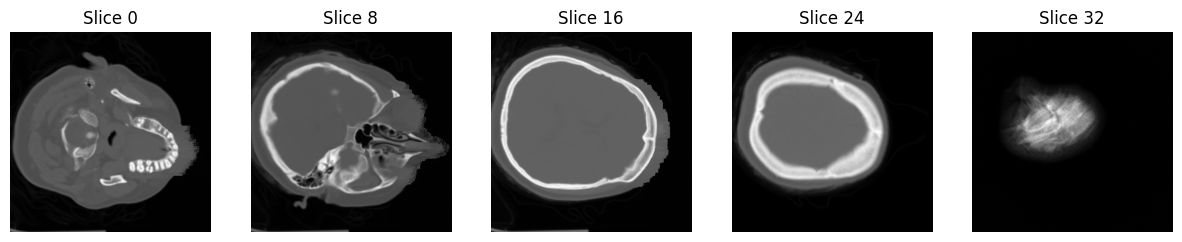

Displaying slices for: 052.nii


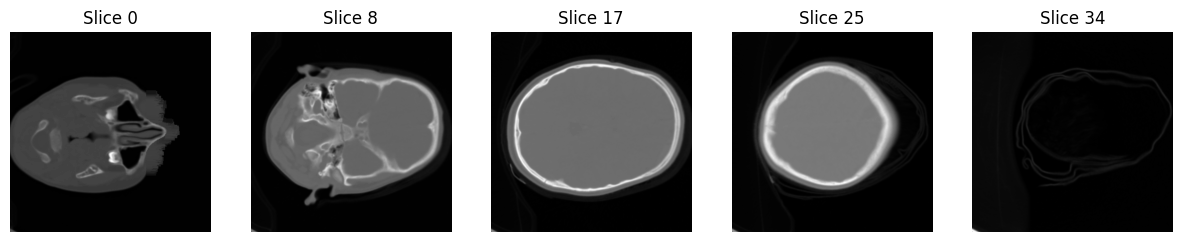

Displaying slices for: 125.nii


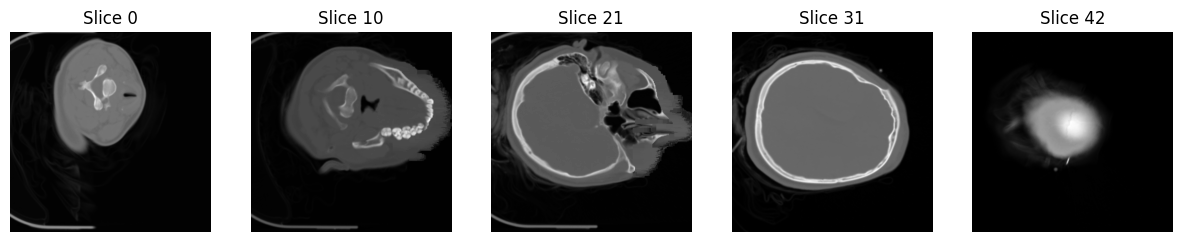

In [4]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
def show_nifti_slices(image, num_slices=5):
    data = image.get_fdata()
    z_slices = data.shape[2]

    slice_indices = np.linspace(0, z_slices - 1, num_slices, dtype=int)

    plt.figure(figsize=(15, 3 * num_slices))

    for i, slice_idx in enumerate(slice_indices):
        plt.subplot(1, num_slices, i + 1)
        plt.imshow(data[:, :, slice_idx], cmap="gray")
        plt.title(f"Slice {slice_idx}")
        plt.axis('off')

    plt.show()

ct_scan_dir = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans"

for idx, filename in enumerate(os.listdir(ct_scan_dir)):
    if filename.endswith('.nii') or filename.endswith('.nii.gz'):
        file_path = os.path.join(ct_scan_dir, filename)
        image = nib.load(file_path)

        print(f"Displaying slices for: {filename}")
        show_nifti_slices(image)

        if idx >= 2:
            break


### Loading NIfTI Images and Extracting Features

In this section, we will load NIfTI images from a specified directory and extract various features from each image. The code is structured as follows:

1. **Import Required Libraries**:
   - **`os`**: For interacting with the file system.
   - **`nibabel`**: For loading NIfTI image files.
   - **`numpy`**: For numerical operations.
   - **`mahotas`**: For texture feature extraction.

2. **Function to Load NIfTI Images**:
   - The `load_nifti_images_from_directory` function takes a directory path as input, iterates through all files, and loads NIfTI files (`.nii` or `.nii.gz`) into a list.
   - It returns a list of loaded images.


In [5]:
import os
import nibabel as nib
import numpy as np
import mahotas

def load_nifti_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            file_path = os.path.join(directory, filename)
            image = nib.load(file_path)
            images.append(image)
    return images

def extract_features(image_data):
    mean_intensity = np.mean(image_data)
    std_intensity = np.std(image_data)
    min_intensity = np.min(image_data)
    max_intensity = np.max(image_data)
    median_intensity = np.median(image_data)

    hist, _ = np.histogram(image_data, bins=10, range=(min_intensity, max_intensity))
    hist = hist / np.sum(hist)

    texture_features = []
    if image_data.ndim == 3:
        for i in range(image_data.shape[2]):
            slice_ = image_data[:, :, i]
            if np.sum(slice_) > 0:
                haralick_features = mahotas.features.haralick(slice_).mean(axis=0)
                texture_features.append(haralick_features)
    else:
        raise ValueError("Unsupported image dimensionality for texture extraction.")

    texture_features = np.mean(texture_features, axis=0) if texture_features else np.zeros(13)

    features = np.hstack([
        mean_intensity,
        std_intensity,
        min_intensity,
        max_intensity,
        median_intensity,
        hist,
        texture_features
    ])

    return features

ct_scan_dir = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans"
nifti_images = load_nifti_images_from_directory(ct_scan_dir)

all_features = []

for img in nifti_images:
    img_data = img.get_fdata()

    print("Image Shape:", img_data.shape)

    features = extract_features(img_data)
    all_features.append(features)
    print("Extracted Features Shape:", features.shape)
    print("Extracted Features:", features)

all_features = np.array(all_features)
np.save("extracted_features.npy", all_features)
print("Features saved to 'extracted_features.npy'")


Image Shape: (512, 512, 33)
Extracted Features Shape: (28,)
Extracted Features: [-4.58942770e+02  6.39717141e+02 -1.01700000e+03  2.15500000e+03
 -8.93000000e+02  5.42136106e-01  2.80868068e-02  6.95952213e-02
  2.71215497e-01  2.13560625e-02  1.64549856e-02  2.32935819e-02
  2.22337896e-02  5.46472723e-03  1.63222804e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Image Shape: (512, 512, 35)
Extracted Features Shape: (28,)
Extracted Features: [-5.82142850e+02  5.40064669e+02 -1.01800000e+03  3.07100000e+03
 -9.66000000e+02  6.37493025e-01  1.90513611e-02  2.82359859e-01
  3.62967355e-02  2.05809457e-02  4.02570452e-03  1.37547084e-04
  3.11715262e-05  1.08991350e-05  1.27519880e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0000000

# NIfTI Image Feature Extraction Using Vision Transformer (ViT)

This Python script extracts features from NIfTI images (CT scans) using a pre-trained Vision Transformer (ViT) model from Hugging Face's Transformers library. The main components are as follows:

## Key Components

1. **Imports**:
   - Libraries: `nibabel`, `numpy`, `torch`, `transformers`, `PIL`, `os`.

2. **Model Initialization**:
   - Loads the ViT feature extractor and model.

3. **Load NIfTI Images**:
   - Function `load_nii_as_image`: Extracts and normalizes a 2D slice from a NIfTI file.

4. **Image Preprocessing**:
   - Function `preprocess_image`: Converts PIL images to tensors for the ViT model.

5. **Feature Extraction**:
   - Function `extract_features_vit`: Extracts features from the image tensor using the ViT model.

6. **Processing Directory**:
   - Iterates through a specified directory, processes each NIfTI file, and stores extracted features in a dictionary.

7. **Saving Features**:
   - Saves the extracted feature vectors to a `.pt` file using PyTorch.


In [3]:
import nibabel as nib
import numpy as np
import torch
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import os

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

def load_nii_as_image(nii_path, slice_index=None):
    nii_image = nib.load(nii_path)
    nii_data = nii_image.get_fdata()

    num_slices = nii_data.shape[2]

    if slice_index is None:
        slice_index = num_slices // 2

    if slice_index < 0 or slice_index >= num_slices:
        raise IndexError(f"Slice index {slice_index} is out of bounds for the NIfTI image with {num_slices} slices.")

    slice_2d = nii_data[:, :, slice_index]

    slice_2d_normalized = ((slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min()) * 255).astype(np.uint8)
    slice_image = Image.fromarray(slice_2d_normalized).convert("RGB")

    return slice_image

def preprocess_image(img):
    inputs = feature_extractor(images=img, return_tensors="pt")
    return inputs

def extract_features_vit(model, img_tensor):
    with torch.no_grad():
        features = model(**img_tensor).last_hidden_state
    return features

ct_scan_dir = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans"
feature_vectors = {}

for filename in os.listdir(ct_scan_dir):
    if filename.endswith('.nii'):
        nii_path = os.path.join(ct_scan_dir, filename)

        try:
            slice_image = load_nii_as_image(nii_path)
            img_tensor = preprocess_image(slice_image)

            features = extract_features_vit(vit_model, img_tensor)
            feature_vectors[filename] = features
            print(f"Extracted features for {filename}")
        except IndexError as e:
            print(f"Error processing {filename}: {e}")
torch.save(feature_vectors, "vit_features.pt")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Extracted features for 109.nii
Extracted features for 052.nii
Extracted features for 125.nii
Extracted features for 121.nii
Extracted features for 049.nii
Extracted features for 106.nii
Extracted features for 128.nii
Extracted features for 115.nii
Extracted features for 100.nii
Extracted features for 096.nii
Extracted features for 051.nii
Extracted features for 122.nii
Extracted features for 087.nii
Extracted features for 074.nii
Extracted features for 129.nii
Extracted features for 067.nii
Extracted features for 119.nii
Extracted features for 057.nii
Extracted features for 117.nii
Extracted features for 092.nii
Extracted features for 077.nii
Extracted features for 066.nii
Extracted features for 081.nii
Extracted features for 123.nii
Extracted features for 089.nii
Extracted features for 105.nii
Extracted features for 127.nii
Extracted features for 058.nii
Extracted features for 120.nii
Extracted features for 088.nii
Extracted features for 124.nii
Extracted features for 072.nii
Extracte


Purpose: Exits the program immediately with a status code of 0, indicating success.
Usage: Often used in child processes to avoid executing cleanup handlers.

In [ ]:
import os
os._exit(00)



## Image Generation with Diffusion Model and Feature Vector Conditioning

This code snippet demonstrates how to generate an image using a diffusion model conditioned on feature vectors extracted from a Vision Transformer (ViT) model.

### Steps:

1. **Import Libraries**:
   - Libraries for deep learning (`torch`), diffusion models (`diffusers`), and image handling (`PIL`) are imported.

2. **Model and Checkpoint Setup**:
   - The base model ID for Stable Diffusion XL is defined.
   - A UNet model is initialized from the configuration and loaded with a pretrained checkpoint from the `tianweiy/DMD2` repository.

3. **Pipeline Creation**:
   - A `DiffusionPipeline` is instantiated with the pretrained base model and the loaded UNet model. The pipeline is configured for half-precision floating-point on a CUDA device.

4. **Scheduler Configuration**:
   - The scheduler is set to use the LCM scheduler based on the existing configuration.

5. **Feature Vector Extraction**:
   - Feature vectors are loaded from a file (`vit_features.pt`), and the mean feature vector is computed for the first filename in the loaded features.

6. **Image Generation**:
   - A prompt is created using the filename from the feature vector.
   - An image is generated using the diffusion pipeline, conditioned on the extracted feature vector.

7. **Save the Image**:
   - The generated image is saved locally as `generated_image.png`.

### Output
The generated image is saved as `generated_image.png` in the current directory, visualizing the abstract representation based on the provided feature vector.


In [1]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
from PIL import Image

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_4step_unet_fp16.bin"

unet = UNet2DConditionModel.from_config(base_model_id, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(torch.load(hf_hub_download(repo_name, ckpt_name), map_location="cuda"))

pipe = DiffusionPipeline.from_pretrained(
    base_model_id,
    unet=unet,
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

vit_features = torch.load("vit_features.pt")

first_filename = next(iter(vit_features))
feature_vector = vit_features[first_filename].mean(dim=1)

prompt = f"An abstract visualization inspired by {first_filename}"
print(f"Generating image with prompt: {prompt}")

image = pipe(
    prompt=prompt,
    num_inference_steps=4,
    guidance_scale=7.5,
    condition=feature_vector
).images[0]

image.save("generated_image.png")
print("Image saved as 'generated_image.png'")


/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all o

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
<ipython-input-1-869262a3a21e>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file.

Generating image with prompt: An abstract visualization inspired by 109.nii


  0%|          | 0/4 [00:00<?, ?it/s]

Image saved as 'generated_image.png'


### !!WE RUN THIS CELL FOR TESTING DMD2 MODEL

## Diffusion Model for Testing Image Generation

This code snippet demonstrates how to use a diffusion model to generate an image based on a text prompt using the `diffusers` library.

### Steps:
1. **Import Libraries**: The necessary libraries are imported, including `torch`, `DiffusionPipeline`, `UNet2DConditionModel`, `LCMScheduler`, and `PIL` for image handling.
  
2. **Model and Checkpoint Loading**:
   - The base model ID for Stable Diffusion XL is set.
   - A specific checkpoint from a repository (`tianweiy/DMD2`) is loaded into a UNet model for conditional generation.
  
3. **Pipeline Creation**:
   - A `DiffusionPipeline` is created using the pretrained model, and the UNet model is integrated. The pipeline is configured to run on a CUDA device with half-precision floating-point.

4. **Scheduler Configuration**: The scheduler is set to use the LCM scheduler configuration.

5. **Image Generation**:
   - A prompt (e.g., "a photo of a cat") is defined.
   - The pipeline generates an image using specified parameters, including the number of inference steps and timesteps.

6. **Save the Image**: The generated image is saved locally as `generated_cat_image.png`.

### Output
The generated image is saved as `generated_cat_image.png` in the current directory.


In [1]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
from PIL import Image

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_4step_unet_fp16.bin"

unet = UNet2DConditionModel.from_config(base_model_id, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(torch.load(hf_hub_download(repo_name, ckpt_name), map_location="cuda"))

pipe = DiffusionPipeline.from_pretrained(
    base_model_id,
    unet=unet,
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

prompt = "a photo of a cat"
image = pipe(
    prompt=prompt,
    num_inference_steps=4,
    guidance_scale=0,
    timesteps=[999, 749, 499, 249]
).images[0]

image.save("generated_cat_image.png")
print("Image saved as 'generated_cat_image.png.")


/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all o

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
The custom timestep schedule contains the following timesteps which are not on the original training/distillation timestep schedule: [749, 249]. You may get unexpected results when using this timestep schedule.


  0%|          | 0/4 [00:00<?, ?it/s]

Image saved as 'generated_cat_image.png.
